In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch_geometric.loader import DataLoader

from exploration.dataset import PyGAcademicGraph

from utils import set_all_seeds, train, evaluate, plot_MSE_scores

from exploitation.models import GAT, GCN


%load_ext autoreload
%autoreload 2

NUM_EXPERIMENTS = 5
set_all_seeds(seed=4)

## Original Graphs Without Weights

In [2]:
batch_size = 1

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="transductive")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="transductive")
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="transductive")
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 36936], y=[359], x=[359, 8], edge_attr=[36936, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 357, 358, 358],
        [  1,  89, 121,  ..., 352,  89, 358]])
Number of features per node:  8


### GCN Without Weights

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "GCN without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GCN(
        input_size=n_features,
        hidden_size=64,
        output_size=1,
        num_layers=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.002)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2385
MSE: 0.2252
Epoch 00002 | Loss: 0.2310
Epoch 00003 | Loss: 0.2399
Epoch 00004 | Loss: 0.2246
Epoch 00005 | Loss: 0.2465
Epoch 00006 | Loss: 0.2296
MSE: 0.2261
Epoch 00007 | Loss: 0.2501
Epoch 00008 | Loss: 0.2466
Epoch 00009 | Loss: 0.2386
Epoch 00010 | Loss: 0.2370
Epoch 00011 | Loss: 0.2248
MSE: 0.2322
Epoch 00012 | Loss: 0.2355
Epoch 00013 | Loss: 0.2347
Epoch 00014 | Loss: 0.2197
Epoch 00015 | Loss: 0.2248
Epoch 00016 | Loss: 0.2248
MSE: 0.2400
Epoch 00017 | Loss: 0.2379
Epoch 00018 | Loss: 0.2231
Epoch 00019 | Loss: 0.2165
Epoch 00020 | Loss: 0.2509
Epoch 00021 | Loss: 0.2358
MSE: 0.2310
Epoch 00022 | Loss: 0.2285
Epoch 00023 | Loss: 0.2199
Epoch 00024 | Loss: 0.2211
Epoch 00025 | Loss: 0.2362
Epoch 00026 | Loss: 0.2413
MSE: 0.2426
Epoch 00027 | Loss: 0.2418
Epoch 00028 | Loss: 0.2418
Epoch 00029 | Loss: 0.2418
Epoch 00030 | Loss: 0.2418
Epoch 00031 | Loss: 0.2418
MSE: 0.2426
Epoch 00032 | Loss: 0.2418
Epoch 00033 | Loss: 0.2418
Epoch 00034

MSE of GCN without weights-0 on the test set: 0.2158
MSE of GCN without weights-1 on the test set: 0.2267
MSE of GCN without weights-2 on the test set: 0.2278
MSE of GCN without weights-3 on the test set: 0.1891
MSE of GCN without weights-4 on the test set: 0.1202
OVERALL: MSE of GCN without weights on the test set: 0.2158


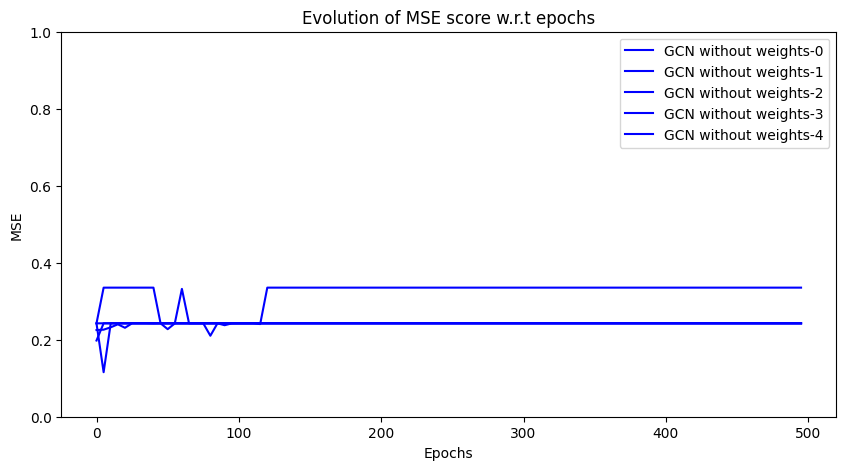

In [4]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

### GAT Without Weights

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "GAT without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GAT(
        input_size=n_features,
        hidden_size=32,
        output_size=1,
        num_layers=2,
        heads=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.005)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.3356
MSE: 0.3353
Epoch 00002 | Loss: 0.3293
Epoch 00003 | Loss: 0.3356
Epoch 00004 | Loss: 0.3247
Epoch 00005 | Loss: 0.3295
Epoch 00006 | Loss: 0.3285
MSE: 0.3353
Epoch 00007 | Loss: 0.3203
Epoch 00008 | Loss: 0.3216
Epoch 00009 | Loss: 0.3163
Epoch 00010 | Loss: 0.3187
Epoch 00011 | Loss: 0.3228
MSE: 0.3353
Epoch 00012 | Loss: 0.3237
Epoch 00013 | Loss: 0.3164
Epoch 00014 | Loss: 0.3227
Epoch 00015 | Loss: 0.3164
Epoch 00016 | Loss: 0.3143
MSE: 0.3353
Epoch 00017 | Loss: 0.3171
Epoch 00018 | Loss: 0.3205
Epoch 00019 | Loss: 0.3122
Epoch 00020 | Loss: 0.3228
Epoch 00021 | Loss: 0.3113
MSE: 0.3353
Epoch 00022 | Loss: 0.3156
Epoch 00023 | Loss: 0.3185
Epoch 00024 | Loss: 0.3216
Epoch 00025 | Loss: 0.3139
Epoch 00026 | Loss: 0.3118
MSE: 0.3353
Epoch 00027 | Loss: 0.3132
Epoch 00028 | Loss: 0.3128
Epoch 00029 | Loss: 0.3175
Epoch 00030 | Loss: 0.3138
Epoch 00031 | Loss: 0.3285
MSE: 0.3353
Epoch 00032 | Loss: 0.3160
Epoch 00033 | Loss: 0.3152
Epoch 00034

MSE of GAT without weights-0 on the test set: 0.3625
MSE of GAT without weights-1 on the test set: 0.2278
MSE of GAT without weights-2 on the test set: 0.2369
MSE of GAT without weights-3 on the test set: 0.2286
MSE of GAT without weights-4 on the test set: 0.3607
OVERALL: MSE of GAT without weights on the test set: 0.2369


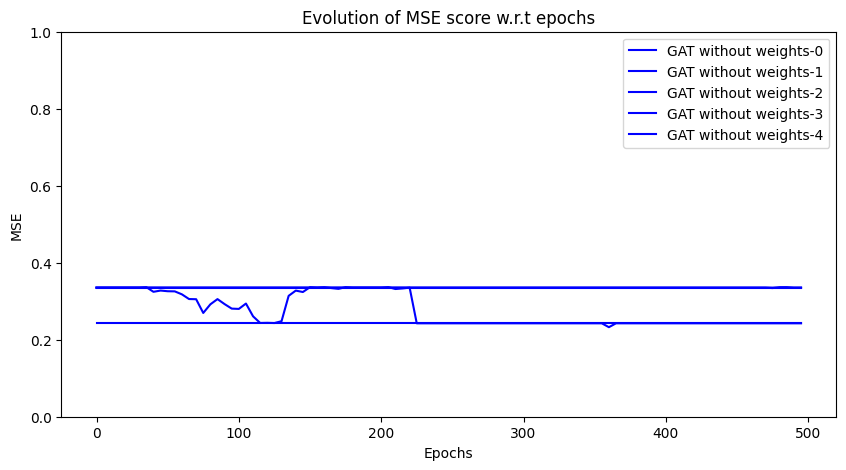

In [6]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

## Original Graphs With Weights

In [7]:
batch_size = 1

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="transductive")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="transductive")
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="transductive")
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 36936], y=[359], x=[359, 8], edge_attr=[36936, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 357, 358, 358],
        [  1,  89, 121,  ..., 352,  89, 358]])
Number of features per node:  8


### GCN With Weights

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "GCN with weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GCN(
        input_size=n_features,
        hidden_size=64,
        output_size=1,
        num_layers=2,
        weighted_graph=True
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.002)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2477
MSE: 0.2426
Epoch 00002 | Loss: 0.2411
Epoch 00003 | Loss: 0.2417
Epoch 00004 | Loss: 0.2418
Epoch 00005 | Loss: 0.2418
Epoch 00006 | Loss: 0.2418
MSE: 0.2426
Epoch 00007 | Loss: 0.2418
Epoch 00008 | Loss: 0.2417
Epoch 00009 | Loss: 0.2418
Epoch 00010 | Loss: 0.2418
Epoch 00011 | Loss: 0.2416
MSE: 0.2426
Epoch 00012 | Loss: 0.2418
Epoch 00013 | Loss: 0.2418
Epoch 00014 | Loss: 0.2418
Epoch 00015 | Loss: 0.2418
Epoch 00016 | Loss: 0.2418
MSE: 0.2426
Epoch 00017 | Loss: 0.2418
Epoch 00018 | Loss: 0.2413
Epoch 00019 | Loss: 0.2417
Epoch 00020 | Loss: 0.2418
Epoch 00021 | Loss: 0.2418
MSE: 0.2426
Epoch 00022 | Loss: 0.2417
Epoch 00023 | Loss: 0.2415
Epoch 00024 | Loss: 0.2418
Epoch 00025 | Loss: 0.2410
Epoch 00026 | Loss: 0.2417
MSE: 0.2426
Epoch 00027 | Loss: 0.2418
Epoch 00028 | Loss: 0.2418
Epoch 00029 | Loss: 0.2417
Epoch 00030 | Loss: 0.2418
Epoch 00031 | Loss: 0.2417
MSE: 0.2426
Epoch 00032 | Loss: 0.2417
Epoch 00033 | Loss: 0.2417
Epoch 00034

MSE of GCN with weights-0 on the test set: 0.2277
MSE of GCN with weights-1 on the test set: 0.1838
MSE of GCN with weights-2 on the test set: 0.2298
MSE of GCN with weights-3 on the test set: 0.1950
MSE of GCN with weights-4 on the test set: 0.2143
OVERALL: MSE of GCN with weights on the test set: 0.2143


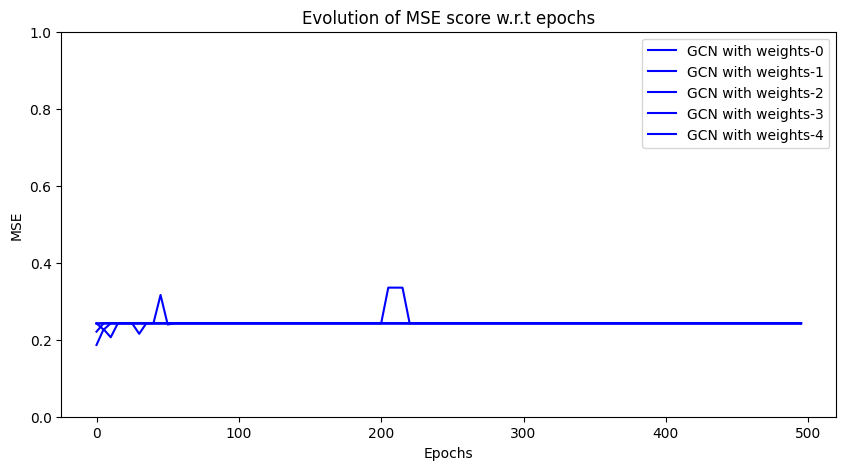

In [9]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

## Sparsified Graphs Without Weights

In [10]:
batch_size = 1
threshold = 30

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="transductive", sparsify_threshold=threshold)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="transductive", sparsify_threshold=threshold)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="transductive", sparsify_threshold=threshold)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 1281], y=[359], x=[359, 8], edge_attr=[1281, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 338, 350, 354],
        [ 89, 183,   0,  ..., 338, 350, 354]])
Number of features per node:  8


### Sparsified GCN Without Weights

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Sparsified GCN without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GCN(
        input_size=n_features,
        hidden_size=64,
        output_size=1,
        num_layers=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.002)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2896
MSE: 0.2426
Epoch 00002 | Loss: 0.2462
Epoch 00003 | Loss: 0.2425
Epoch 00004 | Loss: 0.2430
Epoch 00005 | Loss: 0.2419
Epoch 00006 | Loss: 0.2417
MSE: 0.2426
Epoch 00007 | Loss: 0.2417
Epoch 00008 | Loss: 0.2419
Epoch 00009 | Loss: 0.2426
Epoch 00010 | Loss: 0.2417
Epoch 00011 | Loss: 0.2414
MSE: 0.2426
Epoch 00012 | Loss: 0.2212
Epoch 00013 | Loss: 0.1616
Epoch 00014 | Loss: 0.1552
Epoch 00015 | Loss: 0.1569
Epoch 00016 | Loss: 0.1552
MSE: 0.1693
Epoch 00017 | Loss: 0.1555
Epoch 00018 | Loss: 0.1546
Epoch 00019 | Loss: 0.1565
Epoch 00020 | Loss: 0.1574
Epoch 00021 | Loss: 0.1550
MSE: 0.1670
Epoch 00022 | Loss: 0.1559
Epoch 00023 | Loss: 0.1558
Epoch 00024 | Loss: 0.1547
Epoch 00025 | Loss: 0.1556
Epoch 00026 | Loss: 0.1541
MSE: 0.1660
Epoch 00027 | Loss: 0.1552
Epoch 00028 | Loss: 0.1562
Epoch 00029 | Loss: 0.1555
Epoch 00030 | Loss: 0.1565
Epoch 00031 | Loss: 0.1560
MSE: 0.1681
Epoch 00032 | Loss: 0.1554
Epoch 00033 | Loss: 0.1559
Epoch 00034

MSE of Sparsified GCN without weights-0 on the test set: 0.0174
MSE of Sparsified GCN without weights-1 on the test set: 0.0171
MSE of Sparsified GCN without weights-2 on the test set: 0.0169
MSE of Sparsified GCN without weights-3 on the test set: 0.0171
MSE of Sparsified GCN without weights-4 on the test set: 0.0177
OVERALL: MSE of Sparsified GCN without weights on the test set: 0.0171


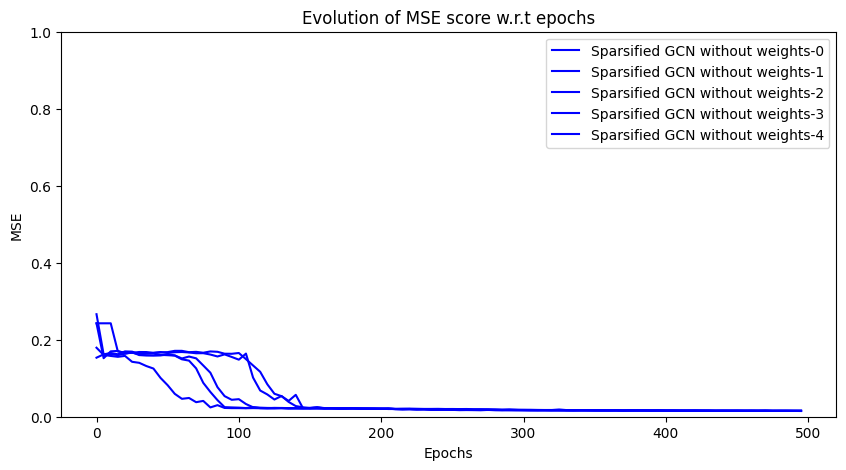

In [12]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

### Sparsified GAT Without Weights

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Sparsified GAT without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GAT(
        input_size=n_features,
        hidden_size=32,
        output_size=1,
        num_layers=2,
        heads=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.005)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2351
MSE: 0.2426
Epoch 00002 | Loss: 0.2134
Epoch 00003 | Loss: 0.1814
Epoch 00004 | Loss: 0.1693
Epoch 00005 | Loss: 0.1555
Epoch 00006 | Loss: 0.1545
MSE: 0.1594
Epoch 00007 | Loss: 0.1501
Epoch 00008 | Loss: 0.1529
Epoch 00009 | Loss: 0.1472
Epoch 00010 | Loss: 0.1444
Epoch 00011 | Loss: 0.1479
MSE: 0.1552
Epoch 00012 | Loss: 0.1421
Epoch 00013 | Loss: 0.1448
Epoch 00014 | Loss: 0.1446
Epoch 00015 | Loss: 0.1434
Epoch 00016 | Loss: 0.1480
MSE: 0.1604
Epoch 00017 | Loss: 0.1486
Epoch 00018 | Loss: 0.1435
Epoch 00019 | Loss: 0.1473
Epoch 00020 | Loss: 0.1450
Epoch 00021 | Loss: 0.1480
MSE: 0.1563
Epoch 00022 | Loss: 0.1458
Epoch 00023 | Loss: 0.1459
Epoch 00024 | Loss: 0.1476
Epoch 00025 | Loss: 0.1444
Epoch 00026 | Loss: 0.1471
MSE: 0.1573
Epoch 00027 | Loss: 0.1448
Epoch 00028 | Loss: 0.1437
Epoch 00029 | Loss: 0.1462
Epoch 00030 | Loss: 0.1470
Epoch 00031 | Loss: 0.1457
MSE: 0.1576
Epoch 00032 | Loss: 0.1424
Epoch 00033 | Loss: 0.1435
Epoch 00034

MSE of Sparsified GAT without weights-0 on the test set: 0.0170
MSE of Sparsified GAT without weights-1 on the test set: 0.0175
MSE of Sparsified GAT without weights-2 on the test set: 0.0159
MSE of Sparsified GAT without weights-3 on the test set: 0.0151
MSE of Sparsified GAT without weights-4 on the test set: 0.0146
OVERALL: MSE of Sparsified GAT without weights on the test set: 0.0159


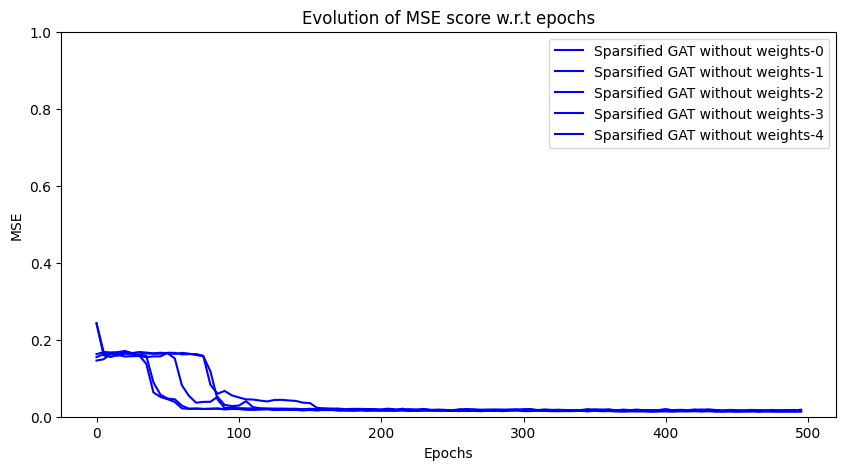

In [14]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

## Sparsified Graphs With Weights

In [15]:
batch_size = 1
threshold = 30

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="transductive", sparsify_threshold=threshold)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="transductive", sparsify_threshold=threshold)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="transductive", sparsify_threshold=threshold)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 1281], y=[359], x=[359, 8], edge_attr=[1281, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 338, 350, 354],
        [ 89, 183,   0,  ..., 338, 350, 354]])
Number of features per node:  8


### Sparsified GCN With Weights

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Sparsified GCN with weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GCN(
        input_size=n_features,
        hidden_size=64,
        output_size=1,
        num_layers=2,
        weighted_graph=True
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.002)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2039
MSE: 0.1572
Epoch 00002 | Loss: 0.1586
Epoch 00003 | Loss: 0.1559
Epoch 00004 | Loss: 0.1542
Epoch 00005 | Loss: 0.1519
Epoch 00006 | Loss: 0.1548
MSE: 0.1650
Epoch 00007 | Loss: 0.1536
Epoch 00008 | Loss: 0.1541
Epoch 00009 | Loss: 0.1556
Epoch 00010 | Loss: 0.1559
Epoch 00011 | Loss: 0.1531
MSE: 0.1611
Epoch 00012 | Loss: 0.1536
Epoch 00013 | Loss: 0.1567
Epoch 00014 | Loss: 0.1550
Epoch 00015 | Loss: 0.1543
Epoch 00016 | Loss: 0.1528
MSE: 0.1615
Epoch 00017 | Loss: 0.1563
Epoch 00018 | Loss: 0.1551
Epoch 00019 | Loss: 0.1536
Epoch 00020 | Loss: 0.1542
Epoch 00021 | Loss: 0.1541
MSE: 0.1667
Epoch 00022 | Loss: 0.1547
Epoch 00023 | Loss: 0.1542
Epoch 00024 | Loss: 0.1540
Epoch 00025 | Loss: 0.1513
Epoch 00026 | Loss: 0.1533
MSE: 0.1650
Epoch 00027 | Loss: 0.1536
Epoch 00028 | Loss: 0.1549
Epoch 00029 | Loss: 0.1536
Epoch 00030 | Loss: 0.1540
Epoch 00031 | Loss: 0.1528
MSE: 0.1650
Epoch 00032 | Loss: 0.1539
Epoch 00033 | Loss: 0.1547
Epoch 00034

MSE of Sparsified GCN with weights-0 on the test set: 0.0178
MSE of Sparsified GCN with weights-1 on the test set: 0.0182
MSE of Sparsified GCN with weights-2 on the test set: 0.0175
MSE of Sparsified GCN with weights-3 on the test set: 0.0180
MSE of Sparsified GCN with weights-4 on the test set: 0.0174
OVERALL: MSE of Sparsified GCN with weights on the test set: 0.0178


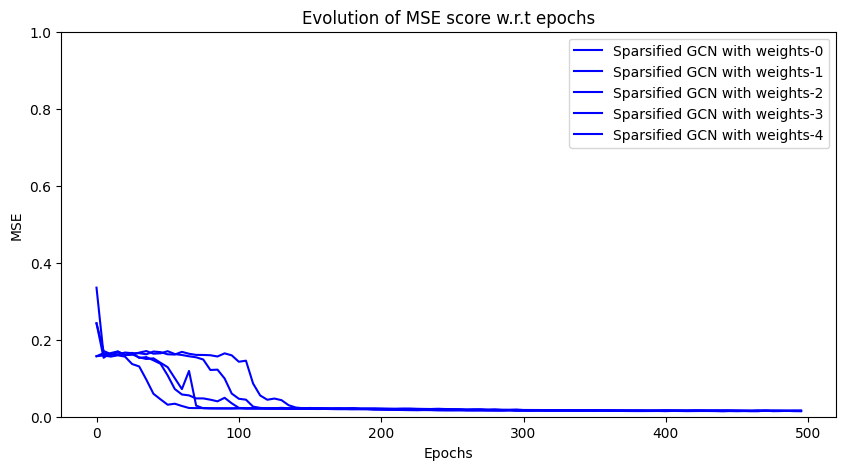

In [17]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)